In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df=pd.read_csv("BostonHousing.csv")

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  CAT. MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 2. انتخاب ویژگی‌ها و هدف
# فرض می‌کنیم ستون `RM` تعداد اتاق‌ها و `MEDV` قیمت خانه‌ها باشد.
X = df[["RM"]].values  # تعداد اتاق‌ها
y = df["MEDV"].values  # قیمت خانه‌ها

# 3. تقسیم داده‌ها به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# 4. مدل خطی (Linear Regression)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# 5. مدل چندجمله‌ای (Polynomial Regression) با درجه 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# 6. ارزیابی مدل‌ها
MAE_linear = mean_absolute_error(y_test, y_pred_linear)
MSE_linear = mean_squared_error(y_test, y_pred_linear)
RMSE_linear = np.sqrt(MSE_linear)


MAE_poly = mean_absolute_error(y_test, y_pred_poly)
MSE_poly = mean_squared_error(y_test, y_pred_poly)
RMSE_poly = np.sqrt(MSE_poly)


# ساخت دیتافریم مقایسه
comparison_df = pd.DataFrame(
    {
        "Linear Regression": [MAE_linear, MSE_linear, RMSE_linear],
        "Polynomial Regression": [MAE_poly, MSE_poly, RMSE_poly],
    },
    index=["MAE", "MSE", "RMSE"]
)

print("Comparison of Linear vs Polynomial Regression:")
print(comparison_df)


Comparison of Linear vs Polynomial Regression:
      Linear Regression  Polynomial Regression
MAE            4.756145               4.541688
MSE           48.112406              43.540247
RMSE           6.936311               6.598503


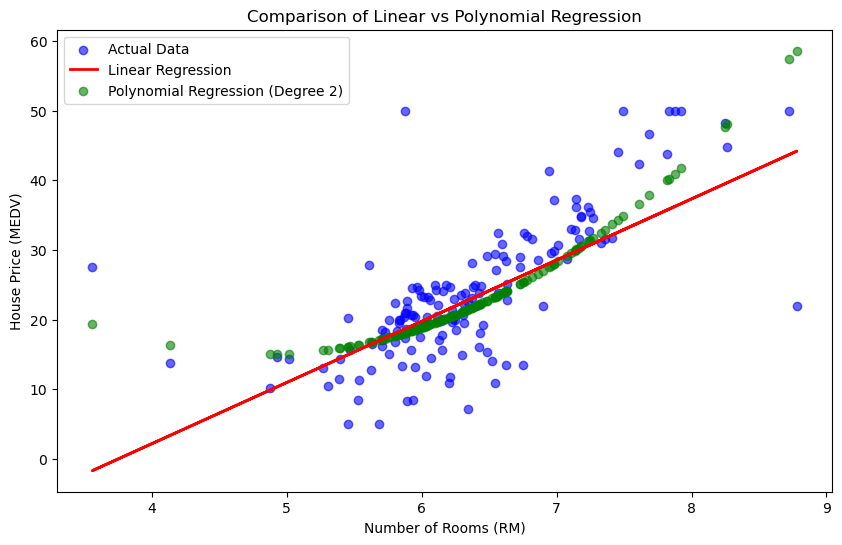

In [18]:

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="blue", label="Actual Data", alpha=0.6)
plt.plot(X_test, y_pred_linear, color="red", label="Linear Regression", linewidth=2)
plt.scatter(X_test, y_pred_poly, color="green", label="Polynomial Regression (Degree 2)", alpha=0.6)
plt.xlabel("Number of Rooms (RM)")
plt.ylabel("House Price (MEDV)")
plt.title("Comparison of Linear vs Polynomial Regression")
plt.legend()
plt.show()

# which degree

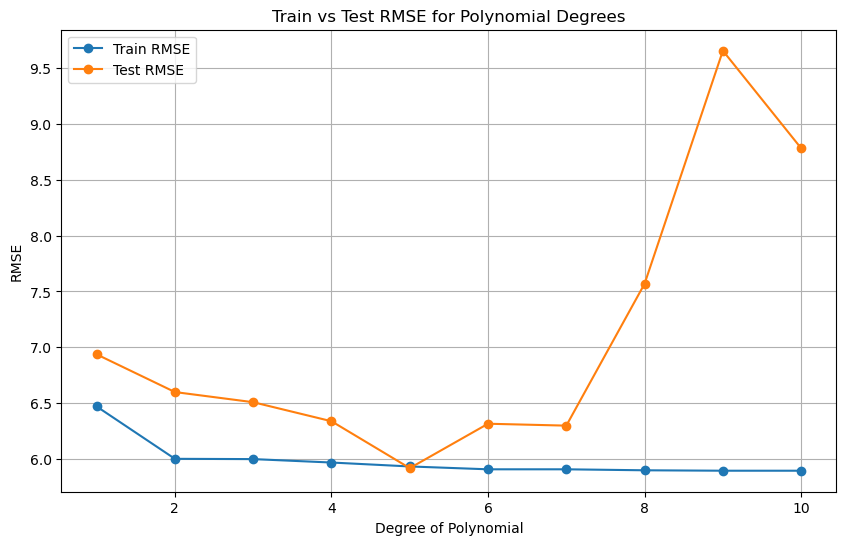

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# 1. بارگذاری دیتاست
df=pd.read_csv("BostonHousing.csv")
X = df[["RM"]].values
y = df["MEDV"].values

# 2. تقسیم داده‌ها به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# 3. بررسی درجات مختلف برای Polynomial Regression
train_RMSE_list = []
test_RMSE_list = []

for degree in range(1, 11):  # درجات 1 تا 10
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    train_RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    train_RMSE_list.append(train_RMSE)
    test_RMSE_list.append(test_RMSE)

# 4. رسم نمودار برای بررسی بهترین درجه
degrees = range(1, 11)
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_RMSE_list, label="Train RMSE", marker='o')
plt.plot(degrees, test_RMSE_list, label="Test RMSE", marker='o')
plt.xlabel("Degree of Polynomial")
plt.ylabel("RMSE")
plt.title("Train vs Test RMSE for Polynomial Degrees")
plt.legend()
plt.grid()
plt.show()


# With High degree

In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# 1. بارگذاری دیتاست
df=pd.read_csv("BostonHousing.csv")

# 2. انتخاب ویژگی‌ها و هدف
X = df[["RM"]].values  # تعداد اتاق‌ها
y = df["MEDV"].values  # قیمت خانه‌ها

# 3. تقسیم داده‌ها به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# 4. مدل خطی (Linear Regression)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# 5. مدل چندجمله‌ای (Polynomial Regression) با درجه 5
poly = PolynomialFeatures(degree=5, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# 6. ارزیابی مدل‌ها
MAE_linear = mean_absolute_error(y_test, y_pred_linear)
MSE_linear = mean_squared_error(y_test, y_pred_linear)
RMSE_linear = np.sqrt(MSE_linear)


MAE_poly = mean_absolute_error(y_test, y_pred_poly)
MSE_poly = mean_squared_error(y_test, y_pred_poly)
RMSE_poly = np.sqrt(MSE_poly)


# ساخت دیتافریم مقایسه
comparison_df = pd.DataFrame(
    {
        "Linear Regression": [MAE_linear, MSE_linear, RMSE_linear],
        "Polynomial Regression (Degree 5)": [MAE_poly, MSE_poly, RMSE_poly],
    },
    index=["MAE", "MSE", "RMSE"]
)

print("Comparison of Linear vs Polynomial Regression (Degree 5):")
print(comparison_df)

Comparison of Linear vs Polynomial Regression (Degree 5):
      Linear Regression  Polynomial Regression (Degree 5)
MAE            4.756145                          4.259774
MSE           48.112406                         35.008275
RMSE           6.936311                          5.916779


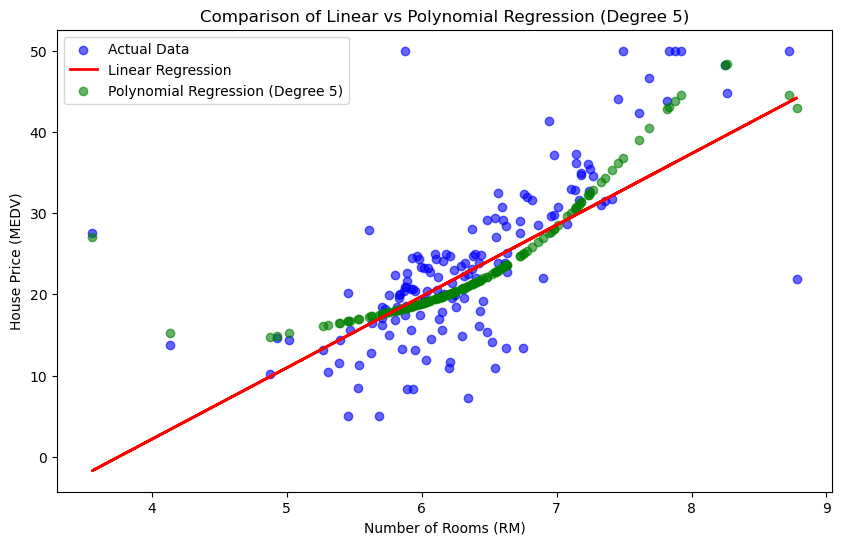

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="blue", label="Actual Data", alpha=0.6)
plt.plot(X_test, y_pred_linear, color="red", label="Linear Regression", linewidth=2)
plt.scatter(X_test, y_pred_poly, color="green", label="Polynomial Regression (Degree 5)", alpha=0.6)
plt.xlabel("Number of Rooms (RM)")
plt.ylabel("House Price (MEDV)")
plt.title("Comparison of Linear vs Polynomial Regression (Degree 5)")
plt.legend()
plt.show()